In [122]:
 # Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
from matplotlib.ticker import FuncFormatter

In [123]:
# Hide Warning Messages in Notebook
import warnings
warnings.filterwarnings('ignore')

In [124]:
mouse_drug_data_to_load = "raw_data/mouse_drug_data.csv"
clinical_trial_data_to_load = "raw_data/clinical_trial_data.csv"

In [125]:
# Read the Mouse and Drug Data
# Load the CSV Files Into Pandas DataFrame
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [126]:
# Read the Clinical Trial Data
# Load the CSV Files Into Pandas DataFrame
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [127]:
# Combine the Data Into a Single DataFrame
mouse_data_complete = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")
mouse_data_complete.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [128]:
# Display Table for Preview
mouse_data_complete.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


TUMOR RESPONSE TO TREATMENT

In [129]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_treatment_response_mean = mouse_data_complete.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
tumor_treatment_response_mean = pd.DataFrame(tumor_treatment_response_mean)

# Preview DataFrame
tumor_treatment_response_mean.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [130]:
# Minor Data Munging to Re-Format the Data Frames
tumor_treatment_response_mean = tumor_treatment_response_mean.reset_index()
tumor_treatment_response_pivot_mean = tumor_treatment_response_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

In [131]:
# Preview That Reformatting Worked
tumor_treatment_response_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [132]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_treatment_response_sem = mouse_data_complete.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

In [133]:
# Convert to DataFrame
tumor_treatment_response_sem = pd.DataFrame(tumor_treatment_response_sem)

In [134]:
# Preview DataFrame
tumor_treatment_response_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [135]:
 # Minor Data Munging to Re-Format the Data Frames
tumor_treatment_response_sem = tumor_treatment_response_sem.reset_index()
tumor_treatment_response_pivot_sem = tumor_treatment_response_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

In [136]:
# Preview That Reformatting Worked
tumor_treatment_response_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


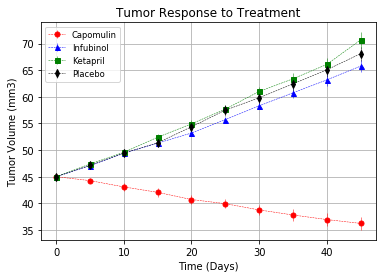

In [137]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_treatment_response_pivot_mean.index, tumor_treatment_response_pivot_mean["Capomulin"], yerr=tumor_treatment_response_pivot_sem["Capomulin"], label="Capomulin", color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_treatment_response_pivot_mean.index, tumor_treatment_response_pivot_mean["Infubinol"], yerr=tumor_treatment_response_pivot_sem["Infubinol"], label="Infubinol", color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_treatment_response_pivot_mean.index, tumor_treatment_response_pivot_mean["Ketapril"], yerr=tumor_treatment_response_pivot_sem["Ketapril"], label="Ketapril", color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_treatment_response_pivot_mean.index, tumor_treatment_response_pivot_mean["Placebo"], yerr=tumor_treatment_response_pivot_sem["Placebo"], label="Placebo", color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/figure1.png")

# Show the Figure
plt.show()

METASTATIC RESPONSE TO TREATMENT

In [138]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
tumor_met_response_mean = mouse_data_complete.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

In [139]:
# Convert to DataFrame
tumor_met_response_mean = pd.DataFrame(tumor_met_response_mean)

In [140]:
# Preview DataFrame
tumor_met_response_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [141]:
# Minor Data Munging to Re-Format the Data Frames
tumor_met_response_mean = tumor_met_response_mean.reset_index()
tumor_met_response_pivot_mean = tumor_met_response_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]



In [142]:
# Preview That Reformatting Worked
tumor_met_response_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [143]:
# Store the Standard Error Associated with Met. Sites Grouped by Drug and Timepoint
tumor_met_response_sem = mouse_data_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

In [144]:
# Convert to DataFrame
tumor_met_response_sem = pd.DataFrame(tumor_met_response_sem)

In [145]:
# Preview DataFrame
tumor_met_response_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [146]:
# Minor Data Munging to Re-Format the Data Frames
tumor_met_response_sem = tumor_met_response_sem.reset_index()
tumor_met_response_pivot_sem = tumor_met_response_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

In [147]:
# Preview That Reformatting Worked
tumor_met_response_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


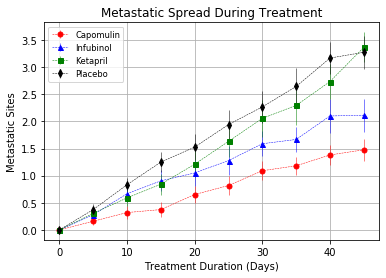

In [148]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_met_response_pivot_mean.index, tumor_met_response_pivot_mean["Capomulin"], yerr=tumor_met_response_pivot_sem["Capomulin"], label="Capomulin", color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_met_response_pivot_mean.index, tumor_met_response_pivot_mean["Infubinol"], yerr=tumor_met_response_pivot_sem["Infubinol"], label="Infubinol", color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_met_response_pivot_mean.index, tumor_met_response_pivot_mean["Ketapril"], yerr=tumor_met_response_pivot_sem["Ketapril"], label="Ketapril", color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_met_response_pivot_mean.index, tumor_met_response_pivot_mean["Placebo"], yerr=tumor_met_response_pivot_sem["Placebo"], label="Placebo", color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/figure2.png")

# Show the Figure
plt.show()

SURVIVAL RATES

In [149]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_treatment_count = mouse_data_complete.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

In [150]:
# Convert to DataFrame
mice_treatment_count = pd.DataFrame({"Mouse Count": mice_treatment_count})

In [151]:
# Preview DataFrame
mice_treatment_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [152]:
# Minor Data Munging to Re-Format the Data Frames
mice_treatment_count = mice_treatment_count.reset_index()
mice_treatment_pivot_count = mice_treatment_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

In [153]:
# Preview the Data Frame
mice_treatment_pivot_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


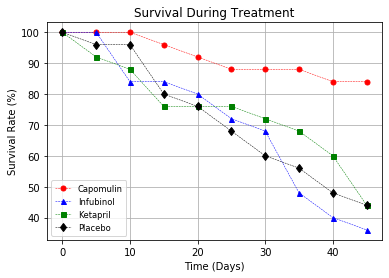

In [154]:
# Generate the Plot (Accounting for Percentages)
plt.plot(100 * mice_treatment_pivot_count["Capomulin"] / 25, "ro", label="Capomulin", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_treatment_pivot_count["Infubinol"] / 25, "b^", label="Infubinol", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_treatment_pivot_count["Ketapril"] / 25, "gs", label="Ketapril", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_treatment_pivot_count["Placebo"] / 25 , "kd", label="Placebo", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/figure3.png")

# Show the Figure
plt.show()

SUMMARY BAR GRAPH

In [155]:
# Calculate the Percent Changes for Each Drug
tumor_percent_change =  100 * (tumor_treatment_response_pivot_mean.iloc[-1] - tumor_treatment_response_pivot_mean.iloc[0]) / tumor_treatment_response_pivot_mean.iloc[0]

In [156]:
# Display the Data to Confirm
tumor_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [157]:
# Store All Relevant Percent Changes Into a Tuple
percent_changes = (tumor_percent_change["Capomulin"],
                  tumor_percent_change["Infubinol"],
                  tumor_percent_change["Ketapril"],
                  tumor_percent_change["Placebo"])

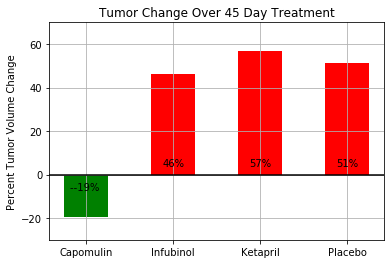

In [158]:
# Splice the Data Between Passing and Failing Drugs
fig, ax = plt.subplots()
ind = np.arange(len(percent_changes))
width = .5
rectsPass = ax.bar(ind[0], percent_changes[0], width, color="green")
rectsFail = ax.bar(ind[1:], percent_changes[1:], width, color="red")
plt.axhline(y=0, color = 'black')
plt.xticks()

# Orient Widths. Orient All Labels. Orient Tick Marks.
ax.set_ylabel("Percent Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo",))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)




# Use Functions to Label Percentages of Change
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                "%d%%" % int(height),
                ha="center", va="bottom", color="black")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
               "-%d%% " % int(height),
               ha="center", va="bottom", color="black")

# Call Functions to Implement Function Calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save Figure
fig.savefig("analysis/Figure4.png")

# Show Figure
fig.show()

FINAL ANALYSIS

(1) TUMOR RESPONSE TO TREATMENT (FIGURE 1)
    -Capomulin is the only drug to decrease tumore size. The other two drugs (Infubinol, Ketapril) showed similar 
    increase in tumor size.
    
(2) METASTATIC SPREAD DURING TREATMENT (FIGURE 2)
    -Capomulin showed the lowest increase in metastatic activity of all the drugs
    
(3) SURVIVAL RATES DURING THE EXPERIMENT (FIGURE 3)
        -Capomulin showed the highest survival rate, dropping from 100% to just over 80%. The other two 
        drugs(Infubinol, Ketapril) had severe drops in survival rates during the 45-day experiment, 
        both dropping below 50%
        
(4) TUMOR CHANGE OVER 45 DAY TREATMENT (FIGURE 4)
    -Figure 4 shows that Capomulin had an overall 19% reduction in tumor volume, while the other two drugs 
        (Infubinol, Ketapril) had significant increases.